### Сидоров Никита, БПМ161

# ЛАБОРАТОРНАЯ РАБОТА 2.
## РЕШЕНИЕ НЕЛИНЕЙНЫХ УРАВНЕНИЙ

### Задание 1 (2.6.4)

In [57]:
import math
import numpy as np
import sympy
%matplotlib inline
import matplotlib.pyplot as plt

Определим функции и методы.

In [58]:
x = sympy.Symbol("x")

#Задаём функцию f(x)
def f(x):
    return math.sqrt(x)*math.exp(math.cos(x))-1

#Дифференцируем при помощи sympy и задаём f'(x)
f_prime=sympy.lambdify(x,sympy.diff(sympy.sqrt(x)*sympy.exp(sympy.cos(x))-1,x))

#Задаём частное f(x)/f'(x)
def phi(x):
    return f(x)/f_prime(x)

#Метод Ньютона
def neuton_solve_equation(phi,x0,eps,maxiter=10):
    """Возвращает список из значений x_n, полученных на каждой итерации"""
    x_n=x0
    x_next=x_n-phi(x_n)
    xs=[]
    xs.append(x_next)
    i=1
    while abs(x_next-x_n) > eps:
        x_n=x_next
        x_next=x_n-phi(x_n)
        xs.append(x_next)
        i+=1
        if i>maxiter:
            break
    return xs

#Метод секущих
def secants_solve_equation(f,x0_1,x0_2,eps,maxiter=10):
    """Возвращает список из значений x_n, полученных на каждой итерации"""
    x_prev=x0_1
    x_n=x0_2
    x_next=x_n-(x_prev-x_n)/(f(x_prev)-f(x_n))*f(x_n)
    xs=[]
    xs.append(x_next)
    i=1
    while abs(x_next-x_n) > eps:
        x_prev=x_n
        x_n=x_next
        x_next=x_n-(x_prev-x_n)/(f(x_prev)-f(x_n))*f(x_n)
        xs.append(x_next)
        i+=1
        if i>maxiter:
            break
    return xs

#Метод бисекции
def bisection(f,a,b,eps,maxiter=1000):
    """Возвращает середину найденного отрезка"""
    for i in range(maxiter):
        if f((a+b)*0.5)*f(a)<0:
            b=(a+b)*0.5
        elif f((a+b)*0.5)*f(a)>0:
            a=(a+b)*0.5
        if abs(b-a)<eps:
            return (a+b)*0.5
    return (a+b)*0.5

Построим график функции f(x).

Text(0,0.5,'f(x)')

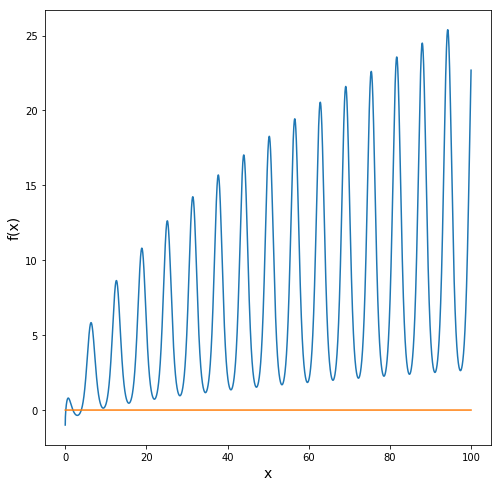

In [59]:
plt.figure(figsize=(8,8))
xs=np.linspace(0,100,10000)
ys=np.array([f(x) for x in xs])
plt.plot(xs,ys)
plt.plot(xs,[0]*10000)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)

Видно, что корни находятся на участке [0,10]. Построим более крупно график функции на этом участке.

Text(0,0.5,'f(x)')

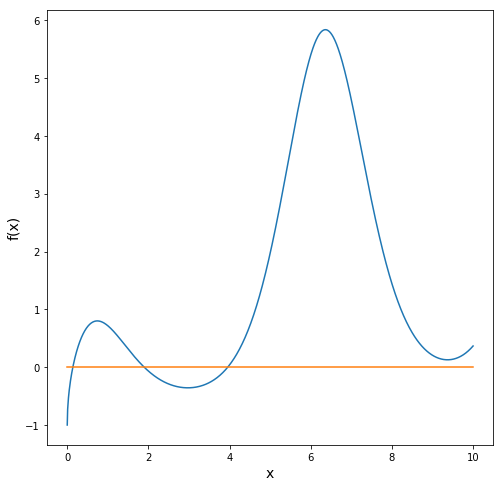

In [60]:
plt.figure(figsize=(8,8))
xs=np.linspace(0,10,1000)
ys=np.array([f(x) for x in xs])
plt.plot(xs,ys)
plt.plot(xs,[0]*1000)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)

Методом бисекции локализуем корни.

In [61]:
x0_1=round(bisection(f,0,1,1e-3),3)
x0_2=round(bisection(f,1,3,1e-3),3)
x0_3=round(bisection(f,3,5,1e-3),3)
print("Начальное приближение для х1: ",x0_1)
print("Начальное приближение для х1: ",x0_2)
print("Начальное приближение для х1: ",x0_3)

Начальное приближение для х1:  0.138
Начальное приближение для х1:  1.897
Начальное приближение для х1:  3.955


Найдём корни методом Ньютона с точностью 1е-5.

In [62]:
x1_neuton=neuton_solve_equation(phi,x0_1,1e-5)
x2_neuton=neuton_solve_equation(phi,x0_2,1e-5)
x3_neuton=neuton_solve_equation(phi,x0_3,1e-5)
print("x1: ",round(x1_neuton[-1],5))
print("x2: ",round(x2_neuton[-1],5))
print("x3: ",round(x3_neuton[-1],5))

x1:  0.13793
x2:  1.89654
x3:  3.95446


Найдём корни методом секущих с точностью 1е-5.

In [63]:
x1_sec=secants_solve_equation(phi,1,x0_1,1e-5)
x2_sec=secants_solve_equation(phi,3,x0_2,1e-5)
x3_sec=secants_solve_equation(phi,5,x0_3,1e-5)
print("x1: ",round(x1_sec[-1],5))
print("x2: ",round(x2_sec[-1],5))
print("x3: ",round(x3_sec[-1],5))

x1:  0.13793
x2:  1.89654
x3:  3.95446


Сравним скорость сходимости.

In [64]:
print('Кол-во шагов метода Ньютона для х1: ', len(x1_neuton))
print('Кол-во шагов метода секущих для х1: ', len(x1_sec))
print('Кол-во шагов метода Ньютона для х2: ', len(x2_neuton))
print('Кол-во шагов метода секущих для х2: ', len(x2_sec))
print('Кол-во шагов метода Ньютона для х3: ', len(x3_neuton))
print('Кол-во шагов метода секущих для х3: ', len(x3_sec))

Кол-во шагов метода Ньютона для х1:  2
Кол-во шагов метода секущих для х1:  3
Кол-во шагов метода Ньютона для х2:  2
Кол-во шагов метода секущих для х2:  3
Кол-во шагов метода Ньютона для х3:  2
Кол-во шагов метода секущих для х3:  3


Найдём корни методом Ньютона с точностью 1е-12.

In [65]:
x1_neuton=neuton_solve_equation(phi,x0_1,1e-12)
x2_neuton=neuton_solve_equation(phi,x0_2,1e-12)
x3_neuton=neuton_solve_equation(phi,x0_3,1e-12)
print("x1: ",round(x1_neuton[-1],12))
print("x2: ",round(x2_neuton[-1],12))
print("x3: ",round(x3_neuton[-1],12))

x1:  0.137930503417
x2:  1.896543139566
x3:  3.954456236916


Найдём корни методом секущих с точностью 1е-12.

In [66]:
x1_sec=secants_solve_equation(phi,1,x0_1,1e-12)
x2_sec=secants_solve_equation(phi,3,x0_2,1e-12)
x3_sec=secants_solve_equation(phi,5,x0_3,1e-12)
print("x1: ",round(x1_sec[-1],12))
print("x2: ",round(x2_sec[-1],12))
print("x3: ",round(x3_sec[-1],12))

x1:  0.137930503417
x2:  1.896543139566
x3:  3.954456236916


Сравним скорость сходимости.

In [67]:
print('Кол-во шагов метода Ньютона для х1: ', len(x1_neuton))
print('Кол-во шагов метода секущих для х1: ', len(x1_sec))
print('Кол-во шагов метода Ньютона для х2: ', len(x2_neuton))
print('Кол-во шагов метода секущих для х2: ', len(x2_sec))
print('Кол-во шагов метода Ньютона для х3: ', len(x3_neuton))
print('Кол-во шагов метода секущих для х3: ', len(x3_sec))

Кол-во шагов метода Ньютона для х1:  3
Кол-во шагов метода секущих для х1:  5
Кол-во шагов метода Ньютона для х2:  3
Кол-во шагов метода секущих для х2:  5
Кол-во шагов метода Ньютона для х3:  3
Кол-во шагов метода секущих для х3:  5


Видно, что во всех случаях метод Ньютона сходится быстрее.

### Задание 2 (2.9.3)

Определим функции и методы.

In [68]:
def f(x):
    return x**3-7*x**2+15*x-9

def f_prime(x):
    return 3*x**2-14*x+15

#Модифицированный метод Ньютона
def neuton_modified(phi,x0,eps,m=1,maxiter=10):
    x_n=x0
    x_next=x_n-m*phi(x_n)
    xs=[]
    xs.append(x_next)
    i=1
    while abs(x_next-x_n) > eps:
        x_n=x_next
        x_next=x_n-m*phi(x_n)
        xs.append(x_next)
        i+=1
        if i>=maxiter:
            break
    return xs

Построим график функции f(x).

Text(0,0.5,'f(x)')

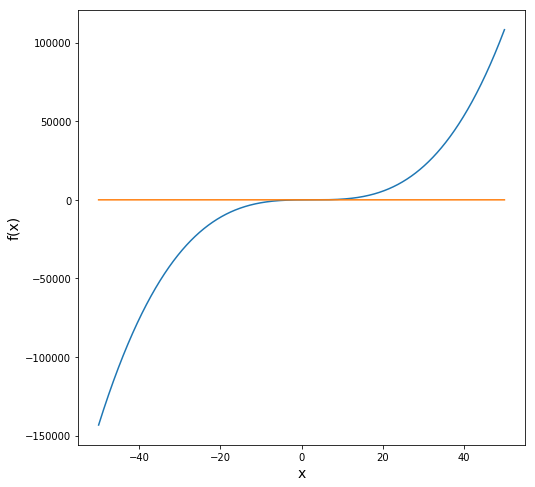

In [69]:
plt.figure(figsize=(8,8))
xs=np.linspace(-50,50,10000)
ys=np.array([f(x) for x in xs])
plt.plot(xs,ys)
plt.plot(xs,[0]*10000)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)

Увеличим часть графика, где находятся корни.

Text(0,0.5,'f(x)')

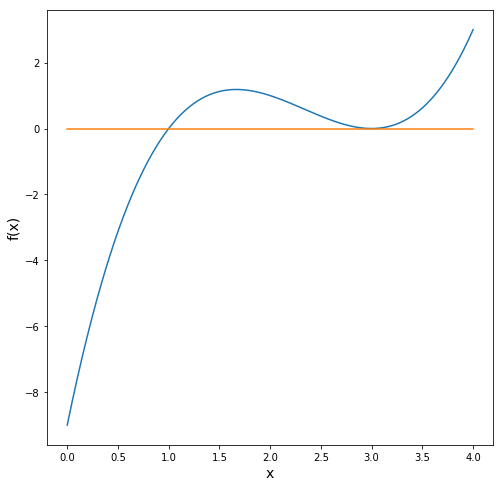

In [70]:
plt.figure(figsize=(8,8))
xs=np.linspace(0,4,1000)
ys=np.array([f(x) for x in xs])
plt.plot(xs,ys)
plt.plot(xs,[0]*1000)
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)

Зададим начальные приближения для корней.

In [71]:
x0_1=1.5
x0_2=4

Из графика видно, что первый корень имеет кратность 1, а второй имеет кратность 2. Попробуем найти первый корень с помощью обычного метода Ньютона.

In [73]:
#Максимальное число итераций
maxiter=1000
x1=neuton_solve_equation(phi,x0_1,1e-7,maxiter=maxiter)
if len(x1)<maxiter:
    print('Метод Ньютона сошёлся к x1 =',round(x1[-1],7), ' за ', len(x1), ' шагов.')
else:
    print('Метод Ньютона не сошёлся за ',maxiter, ' шагов. Полученный результат: ', round(x1[-1],7))

Метод Ньютона сошёлся к x1 = 1.0  за  7  шагов.


Проверим, что второй корень действительно имеет кратность 2, с помощью модифицированного метода Ньютона.

In [74]:
for m in range(1,4):
    x2=neuton_modified(phi,x0_2,1e-7,m=m,maxiter=maxiter)
    if len(x2)<maxiter:
        print('Метод Ньютона c m =',m,' сошёлся к x2 =',round(x2[-1],7), ' за ', len(x1), ' шагов.')
    else:
        print('Метод Ньютона c m =',m,' не сошёлся за ',maxiter, ' шагов. Полученный результат: ', round(x2[-1],7))

Метод Ньютона c m = 1  сошёлся к x2 = 3.0000001  за  7  шагов.
Метод Ньютона c m = 2  сошёлся к x2 = 3.0  за  7  шагов.
Метод Ньютона c m = 3  сошёлся к x2 = 3.0  за  7  шагов.


Быстрее всего сошёлся метод с m = 2. Таким образом, х2 действительно имеет кратность 2.

Такой метод сходится не при любых начальных приближениях. Попробуем задать начальное приближение около х1.

In [75]:
x2=neuton_modified(phi,1.1,1e-7,m=2,maxiter=maxiter)
print('Число итераций: ',len(x2))
print('Полученный результат: ',round(x2[-1],7))

Число итераций:  1000
Полученный результат:  1.0214064


Как видно, метод не сошёлся ни к х2, ни к х1.

Переопределим функцию f(x), добавив к ней $\delta$.

In [76]:
def f(x):
    delta=1e-8
    return x**3-7*x**2+15*x-9+delta

Найдём корень кратности 1 обычным методом Ньютона.

In [77]:
x1=neuton_solve_equation(phi,x0_1,1e-7)
print('x1: ',round(x1[-1],7))

x1:  1.0


Попробуем найти второй корень с помощью модифицированного метода Ньютона.

In [78]:
x2=neuton_modified(phi,x0_2,1e-7,m=2,maxiter=maxiter)
if len(x2)<maxiter:
    print('Метод Ньютона c m = 2 сошёлся к x2 =',round(x2[-1],7), ' за ', len(x1), ' шагов.')
else:
    print('Метод Ньютона c m = 2 не сошёлся за ',maxiter, ' шагов. Полученный результат: ', round(x2[-1],7))

Метод Ньютона c m = 2 не сошёлся за  1000  шагов. Полученный результат:  2.9997766


Используем метод Ньютона с комплексными начальными приближениями.

In [79]:
import cmath

In [85]:
for m in range(1,4):
    x2=neuton_modified(phi,1j+4,1e-7,m=m,maxiter=maxiter)
    if len(x2)<maxiter:
        print('Метод Ньютона c m =',m,' сошёлся к x2 =',round(x2[-1].real,7)+round(x2[-1].imag)*1j, ' за ', len(x1), ' шагов.')
    else:
        print('Метод Ньютона c m =',m,' не сошёлся за ',maxiter, ' шагов. Полученный результат: ',round(x2[-1].real,7)+round(x2[-1].imag)*1j)

Метод Ньютона c m = 1  сошёлся к x2 = (3+0j)  за  7  шагов.
Метод Ньютона c m = 2  не сошёлся за  1000  шагов. Полученный результат:  (3.0000304+0j)
Метод Ньютона c m = 3  не сошёлся за  1000  шагов. Полученный результат:  (3.0001225+0j)


На самом деле кратный корень не сохраняется, потому что вместо него появились два комплексно-сопряжённых корня с кратностями 1. Но поскольку точность метода гораздо ниже необходимой, чтобы отличить эти комплексные корни, х2 по-прежнему получился равным 3.0000000.

Найдём второй комплексный корень, задав другое начальное приближение.

In [86]:
x3=neuton_modified(phi,-1j+4,1e-7,m=1,maxiter=maxiter)
print('Метод Ньютона сошёлся к x3 =',round(x3[-1].real,7)+round(x3[-1].imag)*1j, ' за ', len(x3), ' шагов.')

Метод Ньютона сошёлся к x3 = (3+0j)  за  18  шагов.


Видно, что точность метода 1е-7 не позволяет различить х2 и х3, поскольку изменение функции было очень маленьким (1е-8).